# NST IA Scientific Computing Session 8

## Ruize Li (rl737)
## Jesus College

In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import pi, inf, exp, sin, cos, sqrt
from scipy.integrate import quad, quadrature, odeint

np.set_printoptions(suppress=True) # makes tiny values appear as zero
np.set_printoptions(precision=4)   # number of digits in floats (or longfloats)


# Set font for labels in coming figures
font16 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }
font20 = {'family': 'serif',
          'color':  'black',
          'weight': 'normal',
          'size': 20,
          }

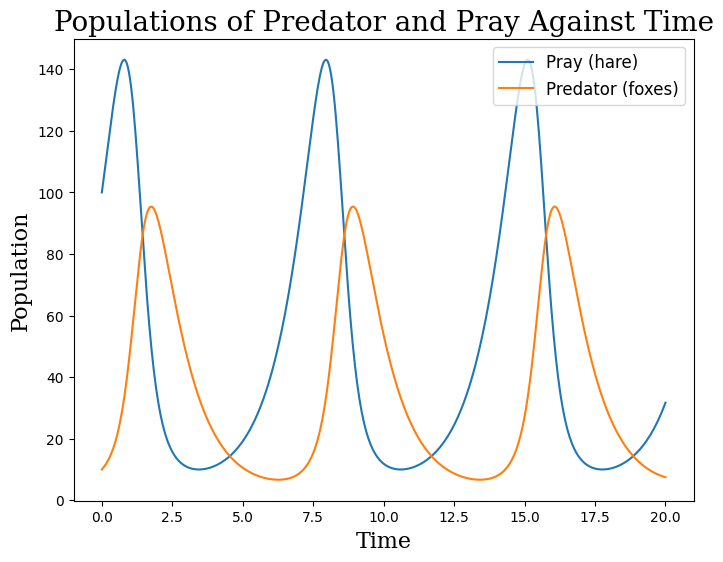

In [2]:
# initialize the array
dy = np.array([0. ,0. ])

# initialize constants
a = 1
c = 1
b = 0.03
d = 0.02

# define the function for Volterra equation
def volterra(y,t):
  dy[0] = a*y[0] - b*y[0]*y[1]
  dy[1] = -c*y[1] + d*y[0]*y[1]
  return dy

# define an array of times
tf = 20
N = 500
ts = np.linspace(0,tf,N)

# define the initial population values as a 2-array
y0 = np.array([100. ,10. ])
y1 = np.array([10., 100. ])
y2 = np.array([55., 55. ])

# solve the problem neumerically with odeint command
sol1 = odeint(volterra, y0, ts)
sol2 = odeint(volterra, y1, ts)
sol3 = odeint(volterra, y2, ts)

# plot the populations of preditor and pray against time
plt.figure(figsize = (8,6))
plt.title('Populations of Predator and Pray Against Time',fontdict=font20)
plt.xlabel('Time',fontdict=font16)
plt.ylabel('Population',fontdict=font16)
plt.plot(ts,sol1[:,0],label='Pray (hare)')
plt.plot(ts,sol1[:,1],label='Predator (foxes)')
plt.legend(fontsize=12)
plt.show()

In [3]:
# get information about the process
sol = odeint(volterra, y0, ts, full_output=True)

print('The total number of integration steps is ',sol[1].get('nst')[-1])

The total number of integration steps is  365


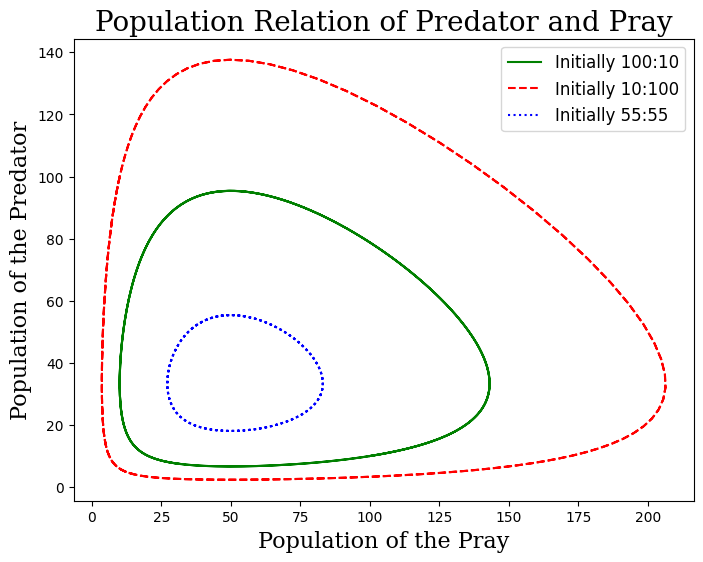

In [4]:
# plot one population versus the other for different sets of initial conditions
plt.figure(figsize=(8,6))
plt.title('Population Relation of Predator and Pray',fontdict=font20)
plt.xlabel('Population of the Pray',fontdict=font16)
plt.ylabel('Population of the Predator',fontdict=font16)
plt.plot(sol1[:,0],sol1[:,1],label='Initially 100:10',color='green')
plt.plot(sol2[:,0],sol2[:,1],label='Initially 10:100',linestyle='dashed',color='red')
plt.plot(sol3[:,0],sol3[:,1],label='Initially 55:55',linestyle='dotted',color='blue')
plt.legend(fontsize=12)
plt.show()